[10  7  6  2  1  3  5  8  6  2]
[  0  10  20  30  40  50  60  70  80  90 100]
[37 12 72  9 75  5 79 64 16  1 76 71  6 25 50 20 18 84 11 28 29 14 50 68
 87 87 94 96 86 13  9  7 63 61 22 57  1  0 60 81  8 88 13 47 72 30 71  3
 70 21]


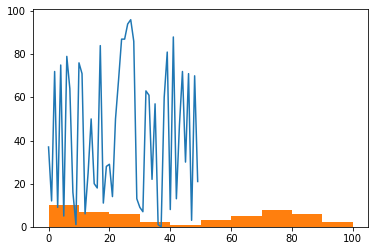

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
# Creating dataset
a = np.random.randint(100, size =(50))
 
# Creating histogram
hist, bins = np.histogram(a, bins = [0, 10,
                                     20, 30,
                                     40, 50,
                                     60, 70,
                                     80, 90,
                                     100])
 
plt.plot(a)
# plt.stairs(hist, bins)
plt.hist(bins[:-1], bins, weights=hist)

print(hist)
print(bins)
print(a)

In [22]:
print(np.linspace(0, 93, 4))

[ 0. 31. 62. 93.]


In [27]:
import numpy as np
from scipy.io import wavfile
from ssqueezepy import ssq_cwt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys

# Get wavelet from .wav file
def wav_to_wavelet(path):
    '''
    path: Direction to .wav file
    '''
    sample_rate, x = wavfile.read(path) 
    twx, wx, *_ = ssq_cwt(x)  # use wx
    print(f'shape: {wx.shape}')
    return np.abs(wx)

# Moving average function
def moving_average(array, window):
    '''
    array: short array have window length
    window: predefine value
    '''
    ret = np.cumsum(array, dtype=float)
    ret[window:] = ret[window:] - ret[:-window]
    return ret[window - 1:] / window

# Moving average for wavelet
def wavelet_to_moving_average(matrix, window):
    '''
    matrix: a set of short array
    window: predefine value
    '''
    ma = []
    for i in matrix:
        i = moving_average(i, window)
        i = np.expand_dims(i, axis=0)
        if ma == []:
            ma = i
        else:
            ma = np.concatenate((ma, i), axis=0)
    return ma

def stairway(value, max_excursion, steps):
    '''
    value: wavelet
    max_excursion: highest chosen value in stairway
    steps: number of bins
    '''
    window = len(value) + 1 - max_excursion
    ma = wavelet_to_moving_average(value, window)
    bins = np.linspace(min(ma), max(ma), steps)
    hist, bins = np.histogram(a, bins = bins)
    # plt.stairs(hist, bins)
    return hist, bins
    


# Plot a chosen row in the matrix
def plot_row(matrix, row, ax, c, option='hist'):
    get = matrix[row]
    for i in range(5):
        ax.plot(np.array([i]*len(get)), np.arange(len(get)), get, c=c)


wav_file = 'wav/apple_and_lemmon.wav'
row = 10
window = 1000

wavelet = wav_to_wavelet(wav_file)
ma = wavelet_to_moving_average(wavelet, window)
hist, bins = stairway(wavelet, 25000, 1000)

# Plot wave -------------------------------------------------------------
fig = plt.figure()  
ax = fig.add_subplot(projection='3d')
plot_row(wavelet, row, ax, 'orange')
plot_row(ma, row, ax, 'b')
# ax.hist(bins[:-1], bins, weights=hist)
ax.set_title(f'Row {row} - Orange=source, Blue=averaged({window})')
plt.show()


shape: (277, 29376)


C:\Users\cuden\AppData\Local\Temp\ipykernel_3308\1324653642.py:38: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if ma == []:


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [15]:
pip install ssqueezepy

  Using cached ssqueezepy-0.6.3-py3-none-any.whl (125 kB)
Note: you may need to restart the kernel to use updated packages.
